In [1]:
import numpy as np
from math import log
import matplotlib.pyplot as plt  
import myLib

In [2]:
#Cholesky decomposition
A = [[6, 15,55],[15,55,225],[55,225,979]]
print(A)
L = myLib.choleskyDecompose(A)
print(L)
print()
print()
A = [[2,1],[1,1]]
B = [[5],[2]]
L,sol = myLib.choleskyDecompose(A,B)
print(L)
print()
print(sol)

[[6, 15, 55], [15, 55, 225], [55, 225, 979]]
[[ 2.44948974  0.          0.        ]
 [ 6.12372436  4.18330013  0.        ]
 [22.45365598 20.91650066  6.11010093]]


[[1.41421356 0.        ]
 [0.70710678 0.70710678]]

[[2.999999999999999], [-0.9999999999999989]]


In [3]:
Data = myLib.file_opener("endsemfitdata.txt")
print(Data)
X = []
Y = []
for i in range(len(Data)):
    X.append(Data[i][0])
    Y.append(Data[i][1])
print(X,Y)

[[-1.0, 0.15125], [-0.92, 0.083828], [-0.84, 0.06289], [-0.76, 0.026487], [-0.68, 0.021388], [-0.6, 0.012808], [-0.52, 0.01801], [-0.44, 0.060025], [-0.36, 0.0785], [-0.28, 0.106431], [-0.2, 0.09939], [-0.12, 0.11565], [-0.04, 0.13377], [0.04, 0.101914], [0.12, 0.097012], [0.2, 0.105238], [0.28, 0.095889], [0.36, 0.051636], [0.44, 0.048207], [0.52, 0.018802], [0.6, 0.020749], [0.68, 0.027548], [0.76, 0.0317], [0.84, 0.069883], [0.92, 0.112413], [1.0, 0.172327]]
[-1.0, -0.92, -0.84, -0.76, -0.68, -0.6, -0.52, -0.44, -0.36, -0.28, -0.2, -0.12, -0.04, 0.04, 0.12, 0.2, 0.28, 0.36, 0.44, 0.52, 0.6, 0.68, 0.76, 0.84, 0.92, 1.0] [0.15125, 0.083828, 0.06289, 0.026487, 0.021388, 0.012808, 0.01801, 0.060025, 0.0785, 0.106431, 0.09939, 0.11565, 0.13377, 0.101914, 0.097012, 0.105238, 0.095889, 0.051636, 0.048207, 0.018802, 0.020749, 0.027548, 0.0317, 0.069883, 0.112413, 0.172327]


In [4]:
#Chebyschev (check ass2_q1)

def cheby(i,X):
        if(i == 0): return 1
        if(i == 1): return (2*X)-1
        if(i == 2): return (8*X*X)-(8*X)+1
        if(i == 3): return (32*X*X*X)-(48*X*X)+(18*X)-1

#C1,cov1,cond1 =  myLib.PolynomialChiSqFit(X, Y, n=4)
C2,cov2,cond2 =  myLib.ChebyPolynomialChiSqFit(X, Y, n=4)

# yfit1 = []
# for i in range(len(X)):
#     yfit1.append(C1[0]+C1[1]*X[i]+C1[2]*X[i]*X[i]+C1[3]*X[i]*X[i]*X[i])

yfit2 = []
for i in range(len(X)):
    #yfit2.append(C2[0]+C2[1]*cheby(1,X[i])+C2[2]*X[i]*X[i]+C2[3]*X[i]*X[i]*X[i])
    sum = 0
    for j in range(4):
        sum += C2[j]*cheby(j,X[i])
    yfit2.append(sum)

[7.52291220e-02 3.20166603e-03 6.38264907e-04 4.21913492e-05] 5643.211883348573


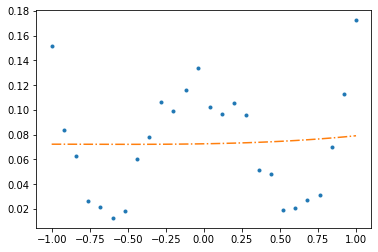

In [6]:
plt.plot(X,Y,'.')
plt.plot(X,yfit2,'-.')
print(C2,cond2)

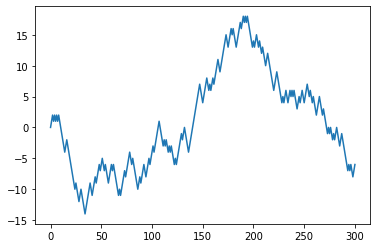

In [8]:
#Random walk using personal random numbers
N = 300
pos = myLib.RandomWalks(N)
plt.plot(range(N+1),pos)

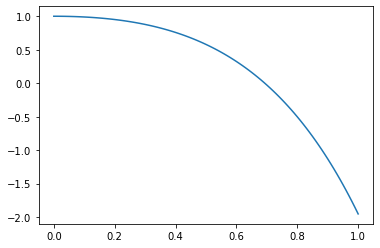

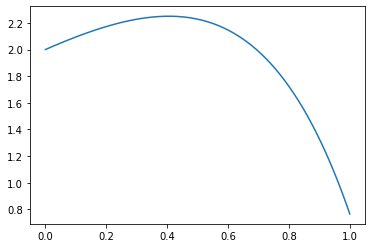

In [2]:
# Coupled ODE
def dydx(x,y,z): return -y+(3*z)
def dzdx(x,y,z): return (4*z)-(2*y)

xl,yl,zl = myLib.coupled_RK4(dzdx,dydx,(0,1),(0,2,1))
plt.plot(xl,zl)
plt.plot()
plt.show()
plt.plot(xl,yl)
plt.show()

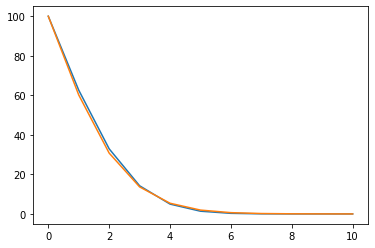

In [8]:
#PDE
def a(t):
    return 100
def b(t):
    return 0
ini = [100,0,0,0,0,0,0,0,0,0,0]

#Explicit
sol1 = myLib.explicitPDEHeat(ini,a,b,1,5,5,10)
#Implicit
sol2 = myLib.implicitPDEHeat(ini,a,b,1,5,5,10)
s = len(ini)
plt.plot(range(s),sol1)
plt.plot(range(s),sol2)



In [12]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
index = [0, -1]

new_a = np.delete(a, index)

print(new_a) #Prints `[1, 2, 5, 6, 8, 9]`
print(a)

[2 3 4 5 6 7 8]
[1 2 3 4 5 6 7 8 9]


In [8]:
a = [2,5,6,7,8]
a = np.insert(a,0,1)
a = np.append(a,3)
print(a)

[1 2 5 6 7 8 3]


In [11]:
H = [[5.2,3,0.5,1,2],[3,6.3,-2,4,0],[0.5,-2,8,-3.1,3],[1,4,-3.1,7.6,2.6],[2,0,3,2.6,15]]

B1 = [[11.7],[11.3],[6.4],[12.1],[22.6]]

L1,sol = myLib.choleskyDecompose(H,B1)
print(L1)
print()
print(sol)

[[ 2.28035085  0.          0.          0.          0.        ]
 [ 1.31558703  2.13757591  0.          0.          0.        ]
 [ 0.2192645  -1.07058726  2.60878631  0.          0.        ]
 [ 0.43852901  1.60138263 -0.5679783   2.12618594  0.        ]
 [ 0.87705802 -0.5397919   0.85472619  1.67683543  3.22444724]]

[[0.999999999999999], [1.0000000000000007], [1.0000000000000002], [1.0], [1.0000000000000002]]
